### Student Information
Name: 陳漢權

Student ID: 108006228

GitHub ID: TerrenceAddison

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Assignment 2

In [150]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [151]:
#load files using panda and set correct column names depending on source of review (amazon, imdb or yelp)
import pandas as pd
#load amazon cell reviews
amazon = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', sep="\t", header=None)
amazon.columns = ['review_text', 'review_score']
amazon['origin'] = "amazon"

#load imdb reviews
imdb = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', sep="\t", header=None)
imdb.columns = ['review_text', 'review_score']
imdb['origin'] = "imdb"
imdb.index = imdb.index + 1000 # fix index


#load yelp reviews
yelp = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', sep="\t", header=None)
yelp.columns = ['review_text', 'review_score']
yelp['origin'] = "yelp"
yelp.index = yelp.index + 1748 # fix index

#combine all into one table
X = pd.concat([amazon,imdb,yelp])
print(len(X))

2748


In [152]:
# add new column for good or bad review based on review_score column for better coherency
import numpy as np
X['review_type'] = np.where(X['review_score']  == 0 , 'bad', 'good') 
print(X)

                                            review_text  review_score  origin  \
0     So there is no way for me to plug it in here i...             0  amazon   
1                           Good case, Excellent value.             1  amazon   
2                                Great for the jawbone.             1  amazon   
3     Tied to charger for conversations lasting more...             0  amazon   
4                                     The mic is great.             1  amazon   
...                                                 ...           ...     ...   
2743  I think food should have flavor and texture an...             0    yelp   
2744                           Appetite instantly gone.             0    yelp   
2745  Overall I was not impressed and would not go b...             0    yelp   
2746  The whole experience was underwhelming, and I ...             0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...             0    yelp   

     review_type  
0       

In [153]:
# data cleanup make sure no missing values, no duplicate data
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x)) # no missing data here


sum(X.duplicated()) # found duplicate data, need to check which field is the duplicate
X.drop_duplicates(keep=False, inplace=True)

In [154]:
len(X) # down from 2748 to 2714

2714

# Data Preprocessing

In [155]:
# Sample data down to 1000
X_sample = X.sample(n=1000)
print(X_sample)

                                            review_text  review_score  origin  \
1250            My 8/10 score is mostly for the plot.               1    imdb   
840   It would take too long to describe how bad my ...             0  amazon   
1075  I guess that nobody at the network that aired ...             0    imdb   
225   These are certainly very comfortable and funct...             1  amazon   
523   I had to go to a store and bought a new NOKIA ...             1  amazon   
...                                                 ...           ...     ...   
2742           I can't tell you how disappointed I was.             0    yelp   
2690        very slow at seating even with reservation.             0    yelp   
238   I was very excited to get this headset because...             1  amazon   
323   I was able to do voice dialing in the car with...             1  amazon   
2344      I got home to see the driest damn wings ever!             0    yelp   

     review_type  
1250    

<AxesSubplot: title={'center': 'Review Origin distribution'}>

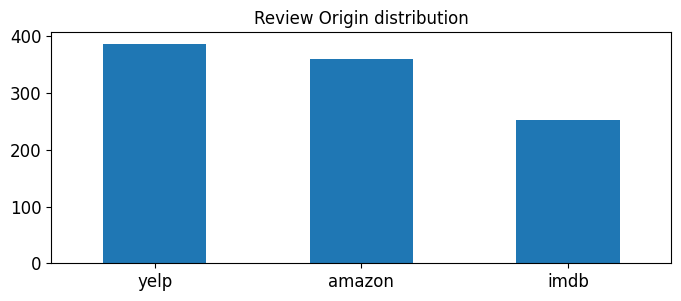

In [156]:
# see distribution between the origin in the sample
import matplotlib.pyplot as plt
%matplotlib inline

max = X_sample.origin.value_counts().max()
# plot barchart for X_sample
X_sample.origin.value_counts().plot(kind = 'bar',
                                           title = 'Review Origin distribution',
                                           ylim = [0, max+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


<AxesSubplot: title={'center': 'Origin distribution Comparison'}>

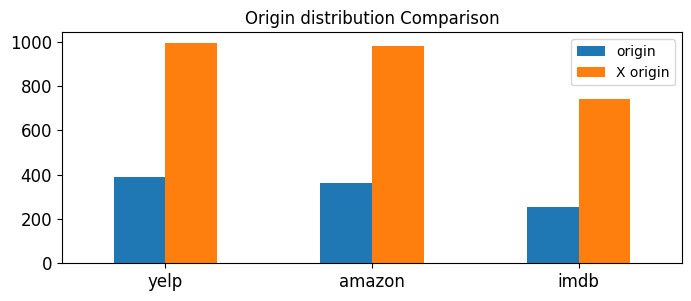

In [157]:
# compare distribution with original dataset
max_x = X.origin.value_counts().max()
max_sample = X_sample.origin.value_counts().max()
max_height = max_x if max_x > max_sample else max_sample
temp = X_sample.origin.value_counts().to_frame()
temp.insert(1, "X origin", X.origin.value_counts().tolist(), True)
temp.plot(kind = 'bar',
                                           title = 'Origin distribution Comparison',
                                           ylim = [0, max_height+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [158]:
#Feature Creation
# we will tokenize the review_text section
import nltk
X['unigrams'] = X['review_text'].apply(lambda x: dmh.tokenize_text(x))

In [159]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [160]:
#Feature subset creation
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.review_text) #learn the vocabulary and return document-term matrix

In [161]:
# check shape
X_counts.shape

(2714, 5153)

In [162]:
# check the value of the singular 1 we find in the first 5 entries of tokenized
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

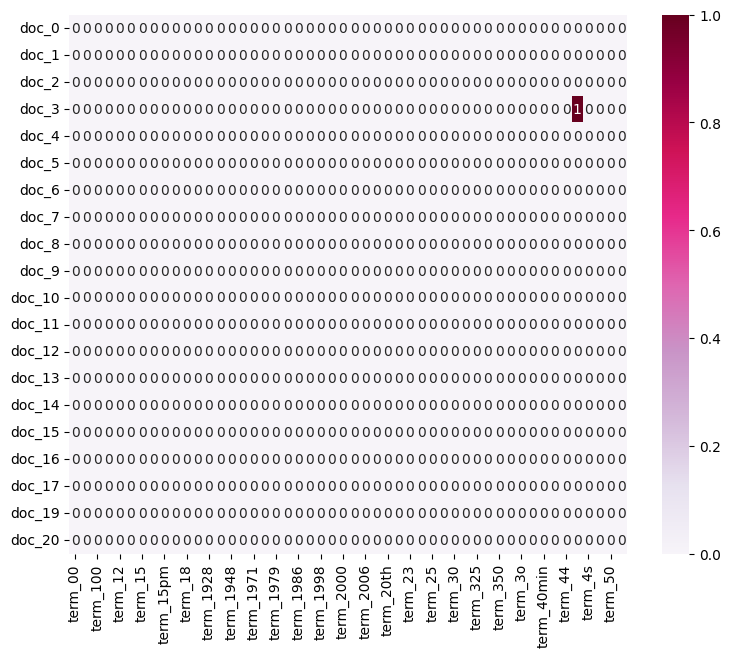

In [163]:
# heat map of 50 terms of first 20 reviews 
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20,0:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Dimensionaltiy Reduction

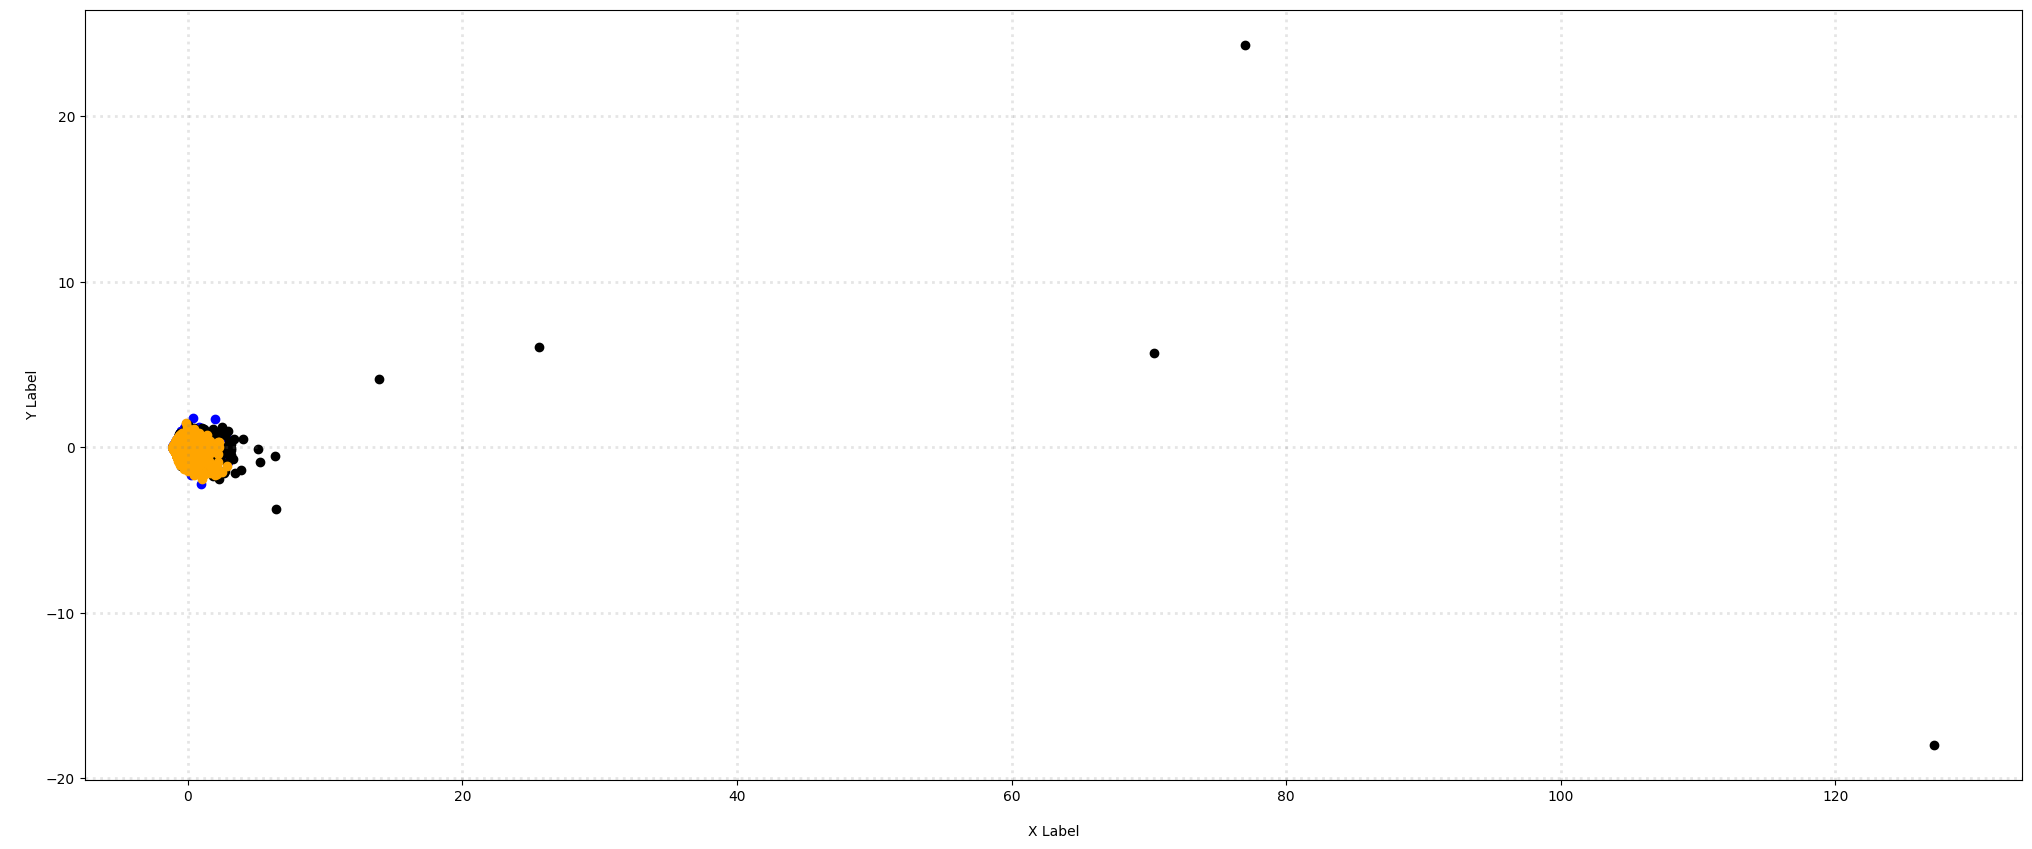

In [164]:
#2D
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
origins = ['amazon', 'imdb', 'yelp']
col = ['blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, origin in zip(col, origins):
    xs = X_reduced[X['origin'] == origin].T[0]
    ys = X_reduced[X['origin'] == origin].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

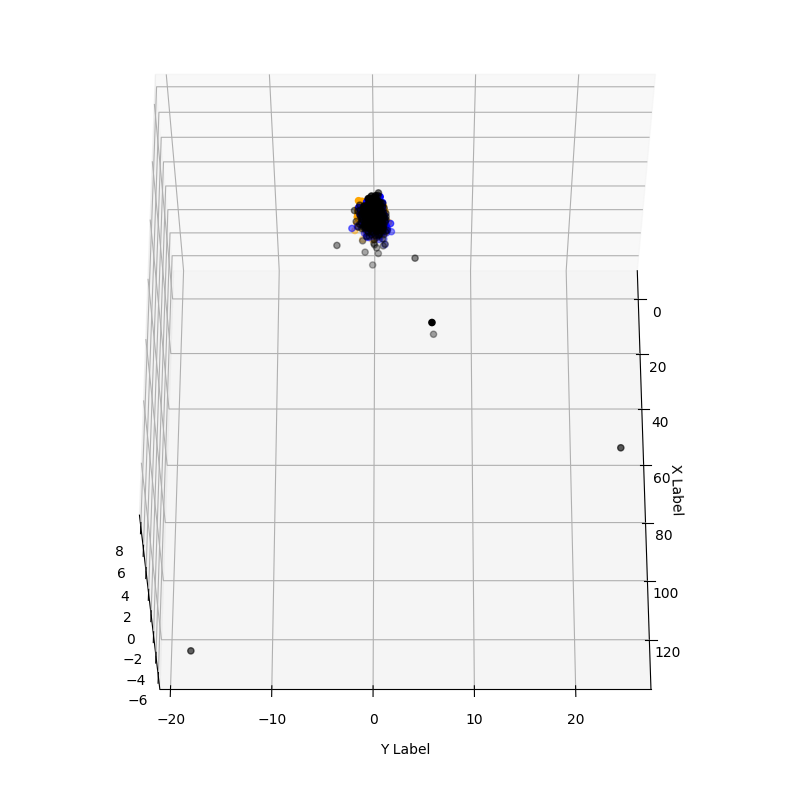

In [165]:
#3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['blue', 'black', 'orange']

fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, origin in zip(col, origins):
    xs = X_reduced[X['origin'] == origin].T[0]
    ys = X_reduced[X['origin'] == origin].T[1]
    zs = X_reduced[X['origin'] == origin].T[2]    
   
    ax.scatter3D(xs, ys,zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

ax.view_init(0,0)
ax.view_init(0,60)
ax.view_init(60,0)

# Attribute Trannsformation


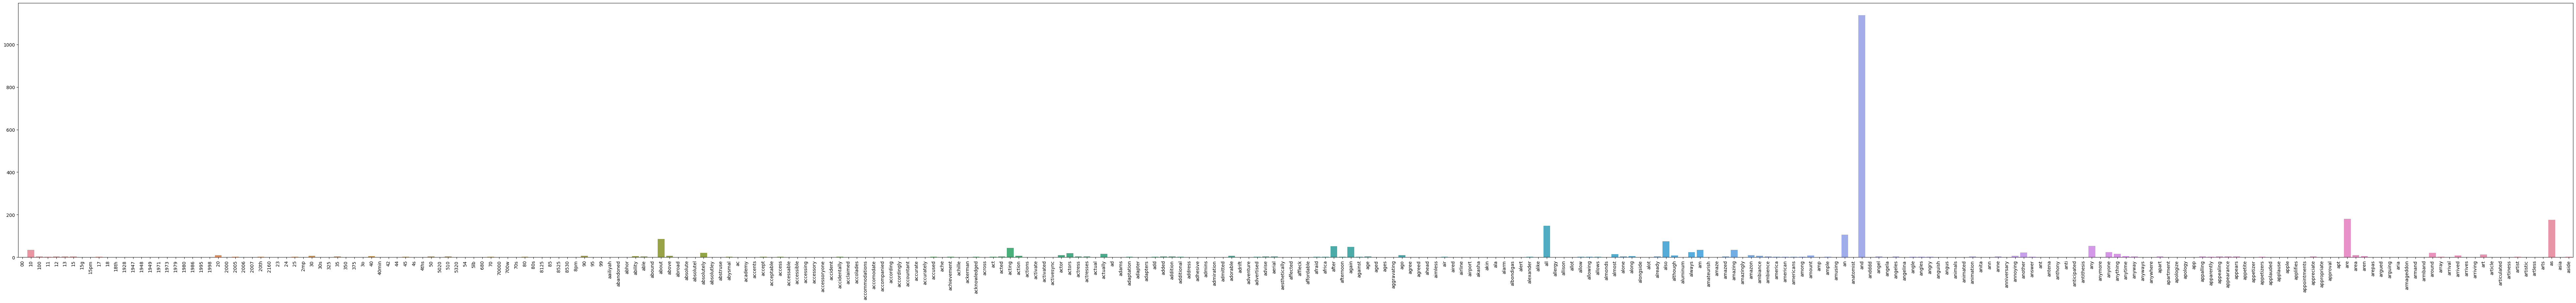

In [170]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [177]:
# create long tail graph using plotly
import plotly.express as px
# need these 2 lines or else graph doesnt show
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.bar(x=count_vect.get_feature_names_out()[:100], y=term_frequencies[:100])
fig.update_layout(xaxis={'categoryorder':'total descending'},font=dict(
        family="Courier New, monospace",
        size=8,
        color="Red"
    ))

term_frequencies2 = []


# Discretization and Binarization

In [90]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.origin)
X['bin_origin'] = mlb.transform(X['origin']).tolist()
X[0:2250]

,review_text,review_score,origin,review_type,unigrams,bin_origin
0,So there is no way for me to plug it in here i...,0,amazon,bad,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,good,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,good,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,bad,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,good,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2246,Their monster chicken fried steak and eggs is ...,1,yelp,good,"[Their, monster, chicken, fried, steak, and, e...","[0, 0, 1]"
2247,Waitress was sweet and funny.,1,yelp,good,"[Waitress, was, sweet, and, funny, .]","[0, 0, 1]"
2248,I also had to taste my Mom's multi-grain pumpk...,1,yelp,good,"[I, also, had, to, taste, my, Mom, 's, multi-g...","[0, 0, 1]"
2249,"I'd rather eat airline food, seriously.",0,yelp,bad,"[I, 'd, rather, eat, airline, food, ,, serious...","[0, 0, 1]"


# Data Transformation

In [94]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['review_text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['review_text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['review_text']
document_to_transform_3.append(random_record_3)


# print out for us to see
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [92]:
from sklearn.preprocessing import binarize
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

# no word similarity therefore we can understand why the score are all 0 when compared to each other

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Assignment 3

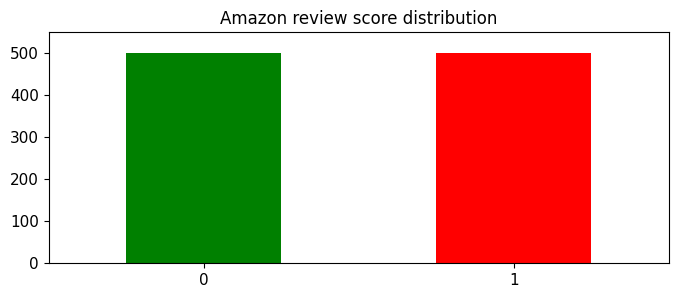

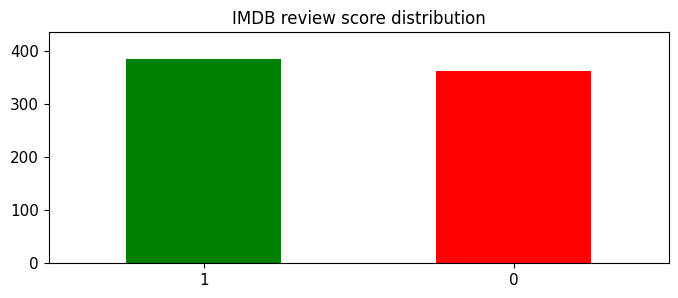

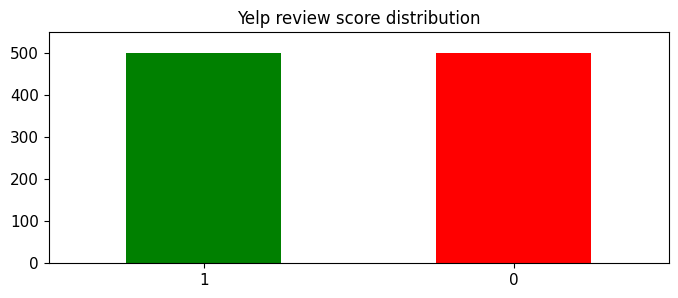

In [140]:
# Useful Data visualization displaying review score comparison for amazon, imdb and yelp respectively
max = amazon.review_score.value_counts().max()
amazonchart = plt.figure(1)
amazonchart = amazon.review_score.value_counts().plot(kind = 'bar',
                                    title = 'Amazon review score distribution',
                                    ylim = [0, max+50], color=['green', 'red'],     
                                    rot = 0, fontsize = 11, figsize = (8,3))

max = imdb.review_score.value_counts().max()
imdbchart = plt.figure(2)
imdbchart = imdb.review_score.value_counts().plot(kind = 'bar',
                                    title = 'IMDB review score distribution',
                                    ylim = [0, max+50], color=['green', 'red'],     
                                    rot = 0, fontsize = 11, figsize = (8,3))

max = yelp.review_score.value_counts().max()
yelpchart = plt.figure(3)
yelpchart = yelp.review_score.value_counts().plot(kind = 'bar',
                                    title = 'Yelp review score distribution',
                                    ylim = [0, max+50], color=['green', 'red'],     
                                    rot = 0, fontsize = 11, figsize = (8,3))
# amazonchart.figure()
# imdbchart.show()
# yelpchart.show()
# plt.plot(amazonchart) 
plt.show() 

In [245]:
# Useful Data visualization displaying 100 most commonly seen words in good reviews

# get data of good reviews only
good_X = X.query("review_score == 1")

#vectorize
from sklearn.feature_extraction.text import CountVectorizer

good_count_vect = CountVectorizer()
good_X_counts = good_count_vect.fit_transform(good_X.review_text)


import plotly.express as px
# need these 2 lines or else graph doesnt show
import plotly.io as pio
pio.renderers.default = 'iframe'
#get term_frequencies in the format ['word', 'count'] and create panda dataframe from it
term_frequencies = []
for j in range(0,good_X_counts.shape[1]):
    term_frequencies.append([good_count_vect.get_feature_names_out()[j],sum(good_X_counts[:,j].toarray())[0]])
gooddf = pd.DataFrame(term_frequencies, columns=['word', 'count'])

dfg = gooddf.sort_values(by=['count'], ascending=False).head(100)
fig = px.bar(dfg, x='word', y = 'count')
fig.update_layout(font=dict(
        family="Courier New, monospace",
        size=8,
        color="Green"
    ))

In [246]:
# Useful Data visualization displaying 100 most commonly seen words in bad reviews
# get data of bad reviews only
bad_X = X.query("review_score == 0")

#vectorize
from sklearn.feature_extraction.text import CountVectorizer

bad_count_vect = CountVectorizer()
bad_X_counts = bad_count_vect.fit_transform(bad_X.review_text)


import plotly.express as px
# need these 2 lines or else graph doesnt show
import plotly.io as pio
pio.renderers.default = 'iframe'


term_frequencies = []
for j in range(0,bad_X_counts.shape[1]):
    term_frequencies.append([bad_count_vect.get_feature_names_out()[j],sum(bad_X_counts[:,j].toarray())[0]])
baddf = pd.DataFrame(term_frequencies, columns=['word', 'count'])

dfg = baddf.sort_values(by=['count'], ascending=False).head(100)
fig = px.bar(dfg, x='word', y = 'count')
fig.update_layout(font=dict(
        family="Courier New, monospace",
        size=8,
        color="Red"
    ))

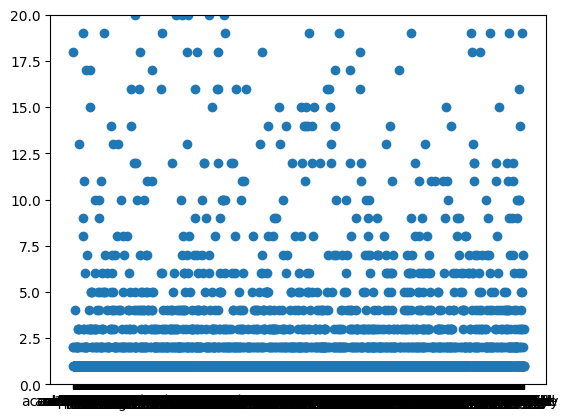

In [280]:
#shows how often in general do words appear multiple times in good review
plt.scatter(gooddf['word'], gooddf['count'])
ax = plt.gca()
ax.set_ylim([0,20])
plt.show()

#It was initially up to 800 but found that the densests are at the lower part so I only display the one that
# 1-20 times.  We can see at this point that it is still quite frequent for some words to appear again and again
# even up to 20

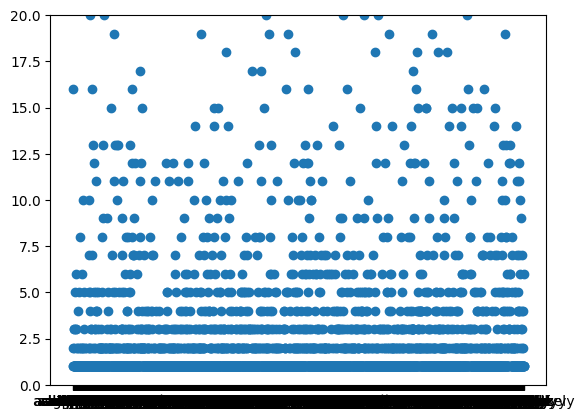

In [281]:
#shows how often in general do words appear multiple times in bad review
plt.scatter(baddf['word'], baddf['count'])
ax = plt.gca()
ax.set_ylim([0,20])
plt.show()

#compared to above we can see they are quite similar to each other even when we compare bad and good review in terms
# of frequency of words appearing.

### Assignment 3 part 2

In [141]:
# We will still use X variable from above
print(X)

                                            review_text  review_score  origin  \
0     So there is no way for me to plug it in here i...             0  amazon   
1                           Good case, Excellent value.             1  amazon   
2                                Great for the jawbone.             1  amazon   
3     Tied to charger for conversations lasting more...             0  amazon   
4                                     The mic is great.             1  amazon   
...                                                 ...           ...     ...   
2743  I think food should have flavor and texture an...             0    yelp   
2744                           Appetite instantly gone.             0    yelp   
2745  Overall I was not impressed and would not go b...             0    yelp   
2746  The whole experience was underwhelming, and I ...             0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...             0    yelp   

     review_type  
0       

In [ ]:
# first vectorize the text
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.review_text)

In [102]:
#Comput IDF values
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X_counts)

AttributeError: 'TfidfTransformer' object has no attribute 'shape'

In [98]:
#print IDF Values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count_vect.get_feature_names_out(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
the,1.825224
and,2.134172
it,2.506810
is,2.533434
this,2.603271
...,...
holiday,8.225481
hollander,8.225481
homework,8.225481
himself,8.225481


In [118]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

y_data = X.review_score
x_idf_train, x_idf_test = train_test_split(df_idf, test_size=0.2, random_state=30)
y_train, y_test = train_test_split(df_idf, test_size=0.2, random_state=30)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_idf_train., y_train)
y_pred = naive_bayes_classifier.predict(x_idf_train)
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

ValueError: Expected 2D array, got 1D array instead:
array=[7.82001636 6.83918711 8.22548147 ... 8.22548147 8.22548147 5.48464145].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Assignment 4

I think one of them is for the initial data creation, as you can see for my assignment 2, I directly use panda instead of manually converting it again using helper. I think this saves a lot of more time and would be more efficient.

For data cleaning, I think instead of first checking using `isnull` we can just instantly run `dropna` function immediately. We can also do the same for duplicates to directly just drop it. Of course this may sometimes not be feasible if some duplicates are intended and require rechecking.

Preprocessing to ensure that the data sampling is correct is much more tedious to use charts. We can instead just use division to see the proportionality (sample / original) and we can see if the randomized sampling was accurate enough.

Dimension reduction does not seem to yield any useful result in my opinion and I think the frequency barcharts and the longtail bar chart has the most significance when interpreting data regarding words inside of emails or even reviews.

I think it is much better for us to actually filter out data that we want / don't want such as filtering out the most common words per category. That would give us some more insight on the common words that are used in a genre.